# Data Processsing

Normally data is not in a shape that it can be used directly for machine learning because

- data has categories and no number values
- data is not comparable
- there are some missing data points

Thus, data needs to be pre-processed before used.

In [23]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd


## IMPORTING DATASET & VISUALIZATION

In [24]:
data = pd.read_csv("./data/diabetes.csv")  #importing files using pandas
data.head(10) #shows top 10 dataset items

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [25]:
# Dataset dimensions - (rows, columns)
data.shape

(768, 9)

In [26]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I assume we didn't really get much insights from the describe function, let’s do a plot and see will that help

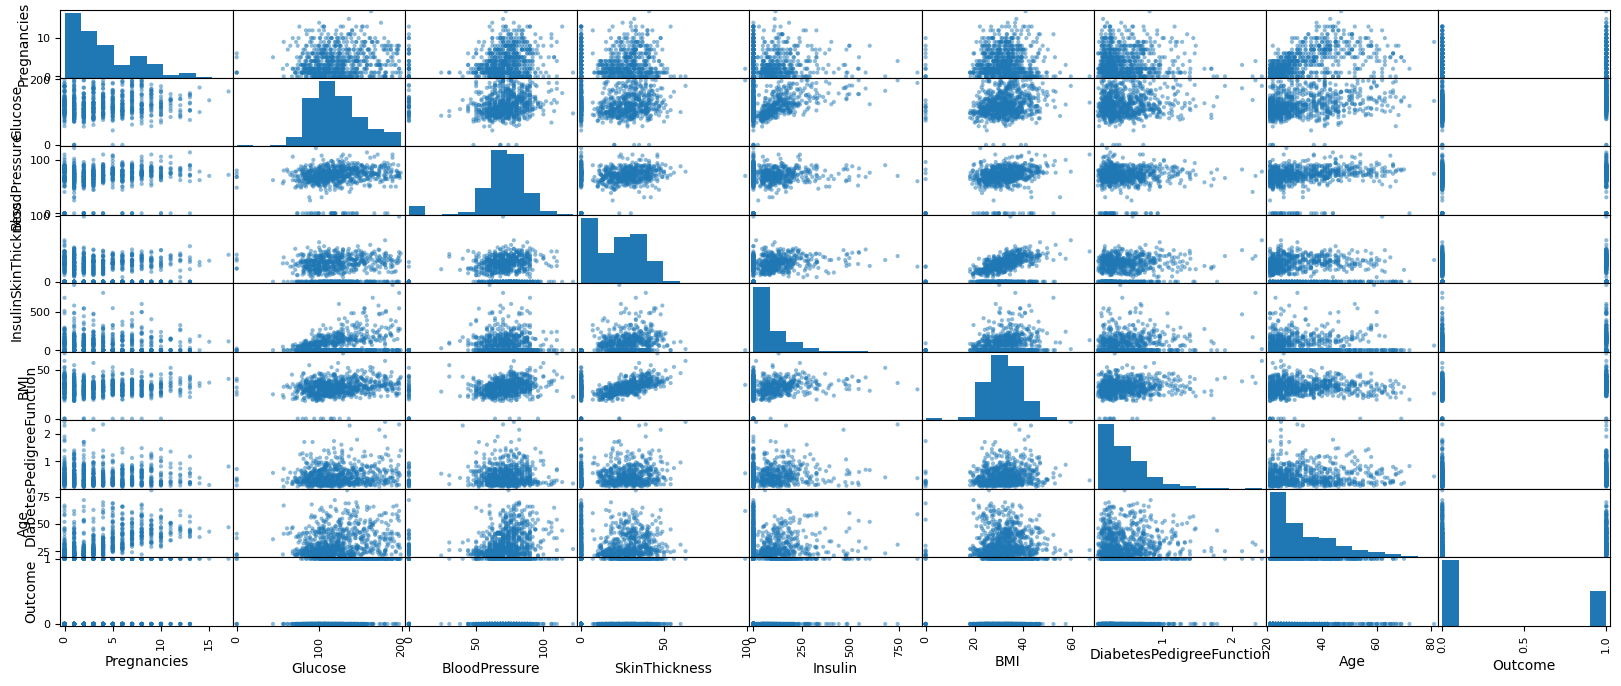

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,8))
plt.show()

In [29]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

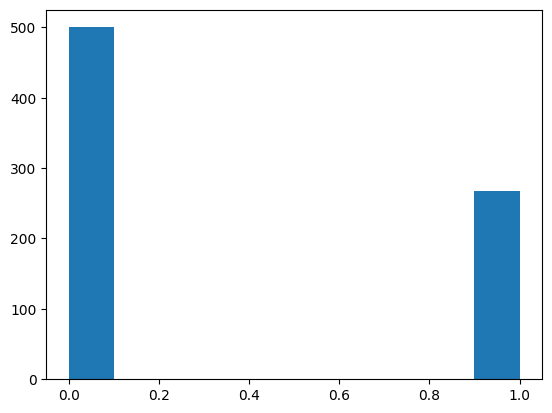

In [30]:
plt.hist(data['Outcome'])
plt.show()

# Cleaning and Converting

### Observations:

1. There are a total of 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.



### Just in case ou have to convert to number value

Let’s get started by converting the ‘Gender’ attributes column into numerical.

We can either select “ordinal encoder technique” or the “One Hot Encoding”.

I will stick with One Hot Encoding as the number of district names are around 31, so the matrix will not be too big. If you have a long list of categorical values it is better to avoid One Hot Encoding as it builds up a huge matrix and it causes high computation cost, I will be writing in more detail about One Hot Encoder Vs Ordinal Encoder in future.

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


tdata = np.array(['Audi', 'Honda', 'Honda','BMW', 'BMW', 'Honda'])

le  = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

print(tdata)
tdata= tdata.reshape(-1,1)
ldata=le.fit_transform(tdata)
print(ldata)
odata = ohe.fit_transform(tdata.reshape(-1,1))
print(odata)




['Audi' 'Honda' 'Honda' 'BMW' 'BMW' 'Honda']
[0 2 2 1 1 2]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tima268/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Missing data

In [32]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
dataset_new = data
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 


# Count of NaN
dataset_new.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [34]:


# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)



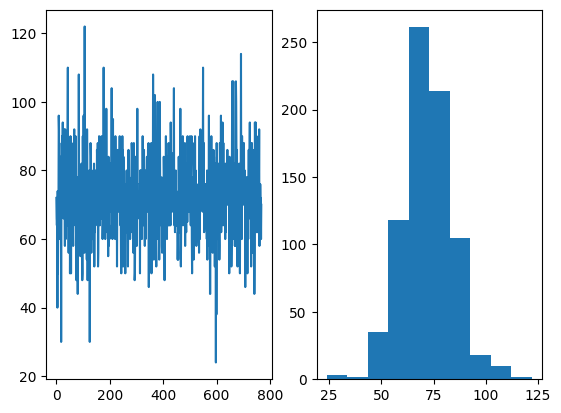

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(dataset_new["BloodPressure"])
ax2.hist(dataset_new["BloodPressure"])
plt.show()

# NORMALIZATION METHODS

### MinMaxScaler

This estimator MinMaxScaler Scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

For each value v in a feature F, _MinMaxScaler_ subtracts the minimum value in the feature and then divides by the range and then normalize to $v_n$. The range is the difference between the original maximum and original minimum.

$$v = \frac{v-min(F)}{max(F)-min(F)}$$
$$v_n = v*(max(V) - min(V)) - min(V)$$


- _MinMaxScaler_ preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

- The default range for the feature returned by MinMaxScaler is 0 to 1.

>Note that _MinMaxScaler_ doesn’t reduce the importance of outliers.

>_MinMaxScaler_ isn’t a bad place to start, unless you know you want your feature to have a normal distribution or you have outliers and you want them to have reduced influence.


In [36]:
### Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
dataset_scaled = sc.fit_transform(dataset_new)


data1 = pd.DataFrame(dataset_scaled)
data1.head



<bound method NDFrame.head of             0         1         2         3         4         5         6  \
0   -0.294118  0.341935 -0.020408 -0.391304 -0.659740 -0.370143 -0.531170   
1   -0.882353 -0.470968 -0.142857 -0.521739 -0.659740 -0.656442 -0.766866   
2   -0.058824  0.793548 -0.183673 -0.518404 -0.659740 -0.791411 -0.492741   
3   -0.882353 -0.419355 -0.142857 -0.652174 -0.807692 -0.595092 -0.923997   
4   -1.000000  0.200000 -0.673469 -0.391304 -0.629808  0.018405  0.887276   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.176471 -0.264516  0.061224 -0.108696 -0.600962 -0.398773 -0.920581   
764 -0.764706  0.006452 -0.061224 -0.565217 -0.659740 -0.239264 -0.776260   
765 -0.411765 -0.006452 -0.020408 -0.652174 -0.764423 -0.672802 -0.857387   
766 -0.882353  0.058065 -0.265306 -0.518404 -0.659740 -0.513292 -0.768574   
767 -0.882353 -0.367742 -0.061224 -0.478261 -0.659740 -0.501022 -0.797609   

            7    8  
0   -0.033333  1.0  
1  

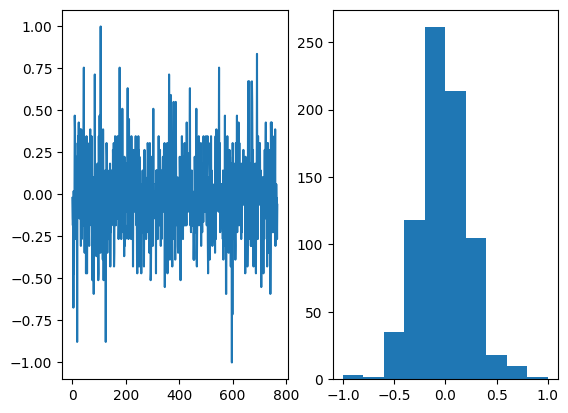

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(data1[2])
ax2.hist(data1[2])
plt.show()

### StandartScaler


The _StandardScaler_ standardizes features by removing the mean and scaling to unit variance.

The standard score z of a value v in feature F is calculated as:

$$z = (x - u) / s$$

where u is the mean of the feature F or zero (if with_mean=False), and s is the standard deviation of the feature F or one if with_std=False.


- StandardScaler is the industry’s go-to algorithm.

- StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
  - Unit variance means dividing all the values by the standard deviation. 
  - StandardScaler does not meet the strict definition .

- StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

- StandardScaler makes the mean of the distribution approximately 0.

In [38]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_scaled = sc.fit_transform(dataset_new)

data2 = pd.DataFrame(dataset_scaled)
data2

,0,1,2,3,4,5,6,7,8
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,-0.732120
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1.365896


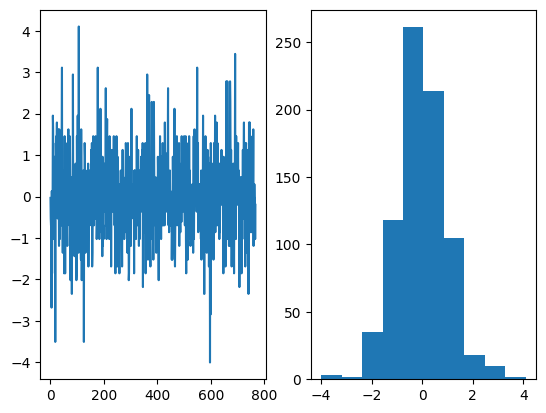

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(data2[2])
ax2.hist(data2[2])
plt.show()

### RobustScaler

Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range.

For each value v in a feature F, _RobustScaler_ subtracts the quartile value Q1 in the feature and then divides by the interqurtile range (Q3-Q1).


  $$v_i = \frac{v_i-Q_1(F)}{Q_3(F)-Q_1(F)}$$

where Q1 is the 1st quartile, and Q3 is the third quartile.

- The _RobustScaler_ does not scale the data into a predetermined interval like MinMaxScaler. 

- It does not meet the strict definition of scale.

- It reduces the effects of outliers.
    

>Note that the range for each feature after _RobustScaler_ is applied is larger than it was for MinMaxScaler.

>Use _RobustScaler_ if you want to reduce the effects of outliers, relative to MinMaxScaler.

In [40]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler(with_centering = True, with_scaling = True)
dataset_scaled = sc.fit_transform(dataset_new)
data4 = pd.DataFrame(dataset_scaled)


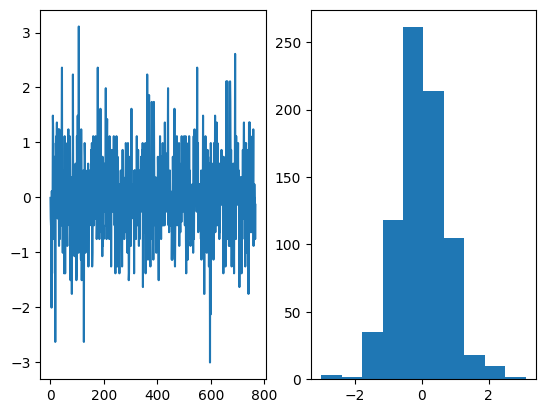

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(data4[2])
ax2.hist(data4[2])
plt.show()